# LangGraph 맛보기

## 환경 설정

In [1]:
from dotenv import load_dotenv

# 환경 변수 로드
load_dotenv()

True

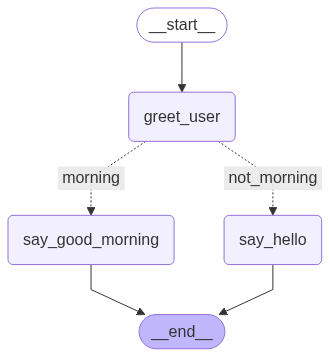

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from IPython.display import Image, display

# 1. 상태 정의
class MyState(TypedDict):
    name: str
    is_morning: bool

# 2. 노드 함수 정의
def greet_user(state: MyState) -> MyState:
    print(f"Hi, {state['name']}!")
    return state

def say_good_morning(state: MyState) -> MyState:
    print("Good morning!")
    return state

def say_hello(state: MyState) -> MyState:
    print("Hello!")
    return state

# 3. 조건 함수 정의
def is_morning(state: MyState) -> Literal["morning", "not_morning"]:
    return "morning" if state["is_morning"] else "not_morning"

# 4. 그래프 구성
builder = StateGraph(MyState)

builder.add_node("greet_user", greet_user)
builder.add_node("say_good_morning", say_good_morning)
builder.add_node("say_hello", say_hello)

builder.add_edge(START, "greet_user")
builder.add_conditional_edges(
    "greet_user",
    is_morning,
    {
        "morning": "say_good_morning",
        "not_morning": "say_hello",
    },
)
builder.add_edge("say_good_morning", END)
builder.add_edge("say_hello", END)

# 5. 그래프 컴파일
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
# 그래프 실행
graph.invoke({"name": "Bob", "is_morning": True})

Hi, Bob!
Good morning!


{'name': 'Bob', 'is_morning': True}

In [5]:
# 그래프 실행
for step in graph.stream({"name": "Bob", "is_morning": False}, stream_mode="values"):
    print(step)
    print("---"*10)

{'name': 'Bob', 'is_morning': False}
------------------------------
Hi, Bob!
{'name': 'Bob', 'is_morning': False}
------------------------------
Hello!
{'name': 'Bob', 'is_morning': False}
------------------------------


In [6]:
# 그래프 실행
for step in graph.stream({"name": "Bob", "is_morning": False}, stream_mode="updates"):
    print(step)
    print("---"*10)

Hi, Bob!
{'greet_user': {'name': 'Bob', 'is_morning': False}}
------------------------------
Hello!
{'say_hello': {'name': 'Bob', 'is_morning': False}}
------------------------------
